In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)

In [4]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [13]:
class AE(nn.Module):
  def __init__(self):
    super().__init__()
      
    # Building an convolutional encoder with Conv2d
    # layer followed by Relu activation function
    # N, 1, 28, 28
    self.encoder = nn.Sequential(
      nn.Conv2d(1, 16, 3, stride=2, padding= 1), # N, 16, 14, 14
      nn.ReLU(),
      nn.Conv2d(16, 32, 3, stride=2, padding=1), # N, 32, 7, 7
      nn.ReLU(),
      nn.Conv2d(32, 64, 7) # N, 64, 1, 1
    )
      
    # Building an linear decoder with Linear
    # layer followed by Relu activation function
    # The Sigmoid activation function
    # outputs the value between 0 and 1
    # 9 ==> 784
    self.decoder = nn.Sequential(
      nn.ConvTranspose2d(64, 32, 7), # N, 32, 7, 7
      nn.ReLU(),
      # We add some padding?
      nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 14, 14
      nn.ReLU(),
      nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1), # N, 1, 28, 28
      nn.Sigmoid()
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [14]:
model = AE()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [15]:
num_epochs = 10
outputs = []
for epoch in range (num_epochs):
  for (img, _) in data_loader:
    recon = model(img)
    loss = criterion(recon, img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  print(f"Epoch: {epoch+1}, Loss: {loss.item():.4f}")
  outputs.append((epoch, img, recon))

Epoch: 1, Loss: 0.0087
Epoch: 2, Loss: 0.0066
Epoch: 3, Loss: 0.0048
Epoch: 4, Loss: 0.0031
Epoch: 5, Loss: 0.0037
Epoch: 6, Loss: 0.0028
Epoch: 7, Loss: 0.0031
Epoch: 8, Loss: 0.0026
Epoch: 9, Loss: 0.0033
Epoch: 10, Loss: 0.0026


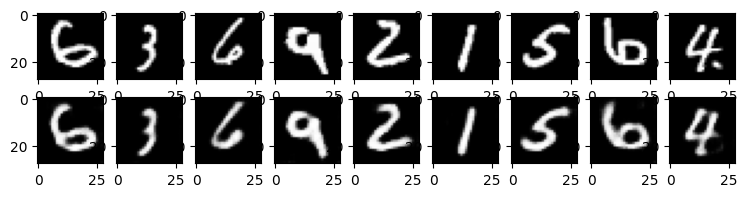

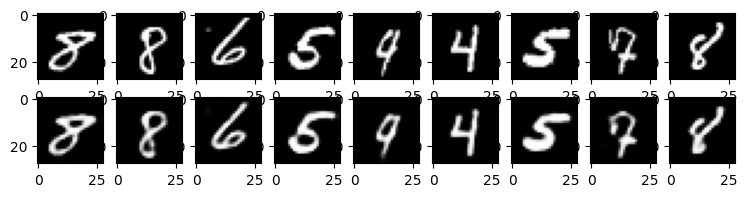

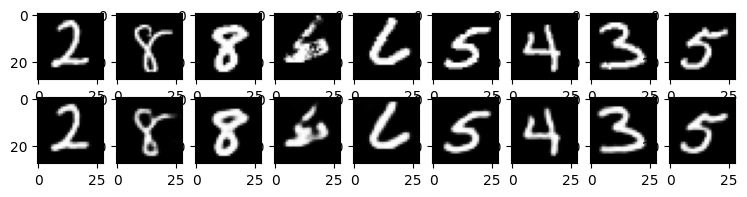

In [16]:
for k in range(0, num_epochs, 4):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs = outputs[k][1].detach().numpy()
  recon = outputs[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i >= 9: break
    plt.subplot(2, 9, i+1)
    plt.imshow(item[0])

  for i, item in enumerate(recon):
    if i >= 9: break
    plt.subplot(2, 9, 9+i+1)
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])